# Assignment 3 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Personal Details:

In [1]:
# Details Student 1:


## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [2]:
# --------------------------------------
import pandas as pd
import numpy as np
import string
# --------------------------------------
# These imports are required for implementing the assignment

from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [3]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [4]:
# word net installation:

# unmark if you want to use and need to install
# !pip install wn
# !python -m wn download omw-he:1.4

In [5]:
# word net import:

# unmark if you want to use:
# import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [6]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install: 
!pip install hebrew_tokenizer

In [7]:
# Hebrew tokenizer import:

# unmark if you want to use:
import hebrew_tokenizer as ht


C:\Users\Litan Idesis


### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [38]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [39]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

As we can observe, the corpus contains 2 columns, one of the story told by students and another one mentioning their gender, which we need to predict later.

In [40]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

### Your implementation:
Write your code solution in the following code-cells

First, we need to preprocess the data given by students and prepare it before handling it for the model.

After a thorough investigation, I've reached some ways to help me produce better quality data before predicting it.

For example, mapping each gender to an integer, because models handle numbers better than strings.
Another way to improve the quality of the corpus would be removing English words, and punctuation which is quite unnecessary.

In [41]:
df_train['gender'] = df_train['gender'].apply(lambda gender: 1 if gender == 'm' else 0)

def remove_english_words(corpus):
    return re.sub('[a-zA-Z]+', '', corpus)

def remove_digits(corpus):
    table = str.maketrans("", "", string.digits)
    return corpus.translate(table)

def remove_punctuation(corpus):
    table = str.maketrans("", "", string.punctuation)
    return corpus.translate(table)

In [42]:
def preprocess(df):
    df["story"] = df["story"].map(lambda punc: remove_punctuation(punc))
    df["story"] = df["story"].map(lambda alphabet: remove_english_words(alphabet))
    df["story"] = df["story"].map(lambda digit: remove_digits(digit))

After defining a fixed process that handles the redundant data, let's apply the changes:

In [43]:
preprocess(df_train)

Let's observe the changes after pre-processing:

In [44]:
df_train.head()

,story,gender
0,כשחבר הזמין אותי לחול לא באמת חשבתי שזה יקרה פ...,1
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,1
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,0
3,כשהייתי ילד מטוסים היה הדבר שהכי ריתק אותי בתו...,1
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,0


In [47]:
stories_list = df_train["story"].tolist()
vectorizer = CountVectorizer()
x_train = vectorizer.fit_transform(stories_list)
y_train = df_train["gender"]
X_train_arr = x_train.toarray()

Let's observe the shape of the X_train now:

In [49]:
x_train.shape
X_train_arr.shape

(753, 34930)

(753, 34930)

Now I should define a method that tokenizes the data so I can send it through a Pipeline:

I have created a pipeline that includes tokenization, vectorization, feature selection, and Naive Bayes classification:

I'v used cross-validation to calculate the F1-score for each fold and then computing the average F1-score (using macro, cv=10 as needed) over all folds.

In [51]:
def tokenize_corpus(text):
    text = str(text)
    tokens = ht.tokenize(text)
    preprocessed_tokens = []
    for sublist in tokens:
        for token in sublist:
            if isinstance(token, str):
                preprocessed_tokens.append(token)
    return ' '.join(preprocessed_tokens)

pipeline = Pipeline([
    ('vectorizer', CountVectorizer(preprocessor=tokenize_corpus)),
    ('feature_selector', SelectKBest(score_func=mutual_info_classif, k=500)),  
    ('classifier', MultinomialNB())
])


pipeline.fit(df_train['story'], df_train['gender'])

scores = cross_val_score(pipeline, df_train['story'], df_train['gender'], scoring=make_scorer(f1_score, average='macro'), cv=10)
average_f1 = scores.mean()

print("Cross-validated F1 scores:", scores)
print("Average F1-score:", average_f1)


Pipeline(steps=[('vectorizer',
                 CountVectorizer(preprocessor=<function tokenize_corpus at 0x00000249B2D351F0>)),
                ('feature_selector',
                 SelectKBest(k=500,
                             score_func=<function mutual_info_classif at 0x00000249B0136670>)),
                ('classifier', MultinomialNB())])

Cross-validated F1 scores: [0.6804037  0.73660357 0.67521368 0.72192797 0.77636216 0.69262295
 0.66124661 0.5939014  0.73570073 0.61607949]
Average F1-score: 0.6890062257780101


Overall, this code builds and trains a classification pipeline to predict gender based on story text. 


Then I tried to achieve a better score than what I obtained with Naive Bayes, so I conducted a grid search to identify the optimal hyperparameters, utilizing the DecisionTreeClassifier

In [18]:
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(preprocessor=tokenize_corpus)),
    ('classifier', DecisionTreeClassifier())
])

param_grid = {
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, scoring='f1_macro', cv=10)
grid_search.fit(df_train['story'], df_train['gender'])

best_pipeline = grid_search.best_estimator_
best_pipeline.fit(df_train['story'], df_train['gender'])

X_train_transformed = best_pipeline.named_steps['vectorizer'].transform(df_train['story'])
df_transformed = pd.DataFrame(X_train_transformed.toarray(), columns=best_pipeline.named_steps['vectorizer'].get_feature_names_out())

print("Best Hyperparameters:", grid_search.best_params_)
print("Best F1-score:", grid_search.best_score_)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vectorizer',
                                        CountVectorizer(preprocessor=<function tokenize_corpus at 0x00000249B275F550>)),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             param_grid={'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__min_samples_split': [2, 5, 10]},
             scoring='f1_macro')

Pipeline(steps=[('vectorizer',
                 CountVectorizer(preprocessor=<function tokenize_corpus at 0x00000249B275F550>)),
                ('classifier',
                 DecisionTreeClassifier(max_depth=20, min_samples_split=10))])

Best Hyperparameters: {'classifier__max_depth': 20, 'classifier__min_samples_split': 10}
Best F1-score: 0.5872284774375952



In order to try and get a better score this time, I set different hyperparameters :

In [19]:
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(preprocessor=tokenize_corpus)),
    ('classifier', DecisionTreeClassifier())
])

param_grid = {
    'classifier__max_depth': [None, 5, 10, 15], 
    'classifier__min_samples_leaf': [1, 2, 3, 4], 
}

grid_search = GridSearchCV(pipeline, param_grid, scoring='f1_macro', cv=10)
grid_search.fit(df_train['story'], df_train['gender'])

best_pipeline = grid_search.best_estimator_

best_pipeline.fit(df_train['story'], df_train['gender'])

X_train_transformed = best_pipeline.named_steps['vectorizer'].transform(df_train['story'])
df_transformed = pd.DataFrame(X_train_transformed.toarray(), columns=best_pipeline.named_steps['vectorizer'].get_feature_names_out())

print("Best Hyperparameters:", grid_search.best_params_)
print("Best F1-score:", grid_search.best_score_)


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vectorizer',
                                        CountVectorizer(preprocessor=<function tokenize_corpus at 0x00000249B275F550>)),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             param_grid={'classifier__max_depth': [None, 5, 10, 15],
                         'classifier__min_samples_leaf': [1, 2, 3, 4]},
             scoring='f1_macro')

Pipeline(steps=[('vectorizer',
                 CountVectorizer(preprocessor=<function tokenize_corpus at 0x00000249B275F550>)),
                ('classifier', DecisionTreeClassifier(min_samples_leaf=4))])

Best Hyperparameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 4}
Best F1-score: 0.6078552782895973


In this case, I used KNN and experimented with different distance metrics as well as different values for n_neighbors:

In [20]:
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(preprocessor=tokenize_corpus)),
    ('classifier', KNeighborsClassifier())
])

param_grid = {
    'classifier__n_neighbors': [5, 10, 15, 20], 
    'classifier__weights': ['uniform', 'distance'], 
    'classifier__p': [1, 2], 
    'vectorizer__min_df': [1, 2, 3], 
    'vectorizer__max_df': [0.7, 0.8, 0.9], 
    'vectorizer__ngram_range': [(1, 1), (1, 2)], 
}

grid_search = GridSearchCV(pipeline, param_grid, scoring='f1_macro', cv=10)
grid_search.fit(df_train['story'], df_train['gender'])

best_pipeline = grid_search.best_estimator_

best_pipeline.fit(df_train['story'], df_train['gender'])

X_train_transformed = best_pipeline.named_steps['vectorizer'].transform(df_train['story'])
df_transformed = pd.DataFrame(X_train_transformed.toarray(), columns=best_pipeline.named_steps['vectorizer'].get_feature_names_out())

print("Best Hyperparameters:", grid_search.best_params_)
print("Best F1-score:", grid_search.best_score_)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vectorizer',
                                        CountVectorizer(preprocessor=<function tokenize_corpus at 0x00000249B275F550>)),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__n_neighbors': [5, 10, 15, 20],
                         'classifier__p': [1, 2],
                         'classifier__weights': ['uniform', 'distance'],
                         'vectorizer__max_df': [0.7, 0.8, 0.9],
                         'vectorizer__min_df': [1, 2, 3],
                         'vectorizer__ngram_range': [(1, 1), (1, 2)]},
             scoring='f1_macro')

Pipeline(steps=[('vectorizer',
                 CountVectorizer(max_df=0.8, min_df=3, ngram_range=(1, 2),
                                 preprocessor=<function tokenize_corpus at 0x00000249B275F550>)),
                ('classifier', KNeighborsClassifier(weights='distance'))])

Best Hyperparameters: {'classifier__n_neighbors': 5, 'classifier__p': 2, 'classifier__weights': 'distance', 'vectorizer__max_df': 0.8, 'vectorizer__min_df': 3, 'vectorizer__ngram_range': (1, 2)}
Best F1-score: 0.5701512886846464


Using this code, two F1-scores are visually compared by generating bar plots with different colored bars. Each bar represents the F1 score, while the x-axis shows the classifier labels, and the y-axis shows the F1 scores above or below 0.6.

Based on KNN & Naive Bais, I have the following results:

<Figure size 800x600 with 0 Axes>

<BarContainer object of 2 artists>

Text(0.5, 0, 'Classifier')

Text(0, 0.5, 'F1-score')

Text(0.5, 1.0, 'F1-score Comparison')

(0.0, 1.0)

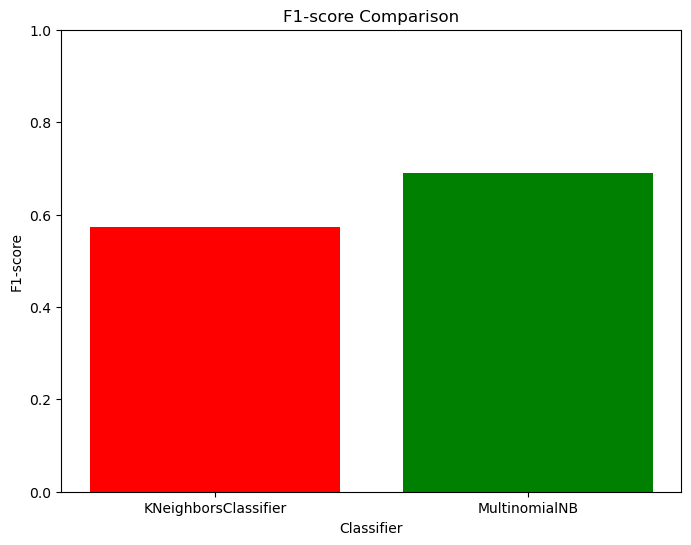

In [52]:
f1_scores = [0.5740210547852937, 0.689927160756329]
labels = ['KNeighborsClassifier', 'MultinomialNB']
colors = ['green' if score > 0.6 else 'red' for score in f1_scores]

plt.figure(figsize=(8, 6))
plt.bar(labels, f1_scores, color=colors)
plt.xlabel('Classifier')
plt.ylabel('F1-score')
plt.title('F1-score Comparison')
plt.ylim(0, 1) 
plt.show()

The Naive Bayes algorithm achieved the best score, with 0.68!


It's now time to process the df_test dataset:

I used SGDClassifier:

In [53]:
sgd_cls = SGDClassifier(random_state=42)
sgd_cls.fit(X_train_arr, y_train)
y_pred = sgd_cls.predict(X_train_arr)

SGDClassifier(random_state=42)

Preprocessing is also necessary for the df_test dataset:

In [54]:
preprocess(df_test)

In [25]:
vectorizer = CountVectorizer()
x_train = vectorizer.fit_transform(df_train['story'].tolist())
x_test = vectorizer.transform(df_test['story'].tolist())
X_test_arr = x_test.toarray()

Converting the categories back to 'm' and 'f', and then storing the results in a new DataFrame:

In [55]:
predictions = sgd_cls.predict(X_test_arr)

predictions = ['m' if gender == 1 else 'f'  for gender in predictions]

df_predicted = pd.DataFrame({'test_example_id':df_test['test_example_id'],
                          'predicted_gender':predictions})

Let's observe the first and last 5 predictions, as we were asked on the assignment:

In [27]:
df_predicted.head(5)

,test_example_id,predicted_gender
0,0,m
1,1,m
2,2,m
3,3,m
4,4,m


In [28]:
df_predicted.tail(5)

,test_example_id,predicted_gender
318,318,m
319,319,m
320,320,m
321,321,m
322,322,m
